In [1]:
from Bio.Seq import Seq


In [2]:
seq1 = Seq('ACTCGA')
seq2 = Seq('AC')

GC Content in DNA

In [3]:
from Bio.SeqUtils import GC

In [4]:
GC(seq1) #use library

50.0

In [5]:
def gc_content(seq):
    result = float(seq.count('G') + seq.count('C'))/len(seq) * 100
    return result

In [6]:
gc_content(seq1)

50.0

In [7]:
def gc_content1(seq):
    gc = [ N for N in seq if N in 'CG']
    result = float(len(gc))/len(seq)*100
    return result

In [8]:
gc_content1(seq1)

50.0

Alignment Tyoes

In [9]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [10]:
alignments = pairwise2.align.globalxx(seq1, seq2)

In [11]:
print(alignments)

[Alignment(seqA='ACTCGA', seqB='A--C--', score=2.0, start=0, end=6), Alignment(seqA='ACTCGA', seqB='AC----', score=2.0, start=0, end=6)]


In [12]:
print(format_alignment(*alignments[0]))

ACTCGA
|  |  
A--C--
  Score=2



In [13]:
print(format_alignment(*alignments[1]))

ACTCGA
||    
AC----
  Score=2



In [14]:
for a in alignments:
    print(format_alignment(*a))

ACTCGA
|  |  
A--C--
  Score=2

ACTCGA
||    
AC----
  Score=2



In [15]:
# Get only the score for one alignments
alignments2 = pairwise2.align.globalxx(seq1,seq2,one_alignment_only=True,score_only=True)

In [16]:
alignments2

2.0

Check for similarity or percentage of similarity

In [17]:
alignments2/len(seq1)*100

33.33333333333333

In [18]:
def haming_distance(lhs, rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y]) # zip giong vi tri

In [19]:
haming_distance('ACTTA','ACCTA')

1

In [20]:
haming_distance(seq1,seq1[::-1])  #reverse

4


## Dot Plot
* A dot plot is a graphical method that allows the comparison of two biological sequences and identify regions of close similarity between them.
* Simplest method - put a dot wherever sequences are identical
* Dot plots compare two sequences by organizing one sequence on the x-axis, and another on the y-axis, of a plot.
* When the residues of both sequences match at the same location on the plot, a dot is drawn at the corresponding position

## usefulness
* Dot plots can also be used to visually inspect sequences for
* direct or inverted repeats
* regions with low sequence complexity.
* Similar regions
* Repeated sequences
* Sequence rearrangements
* RNA structures
* Gene orderM


In [21]:

def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [22]:
# Do A dot plot
dotplot(seq1, seq2)

 |AC
----
A|■ 
C| ■
T|  
C| ■
G|  
A|■ 


In [23]:
dotplot(Seq('ACCTAG'),Seq('ACCTAG')) ##  Identical proteins will obviously have a diagonal line in the center of the matrix. 

 |ACCTAG
--------
A|■   ■ 
C| ■■   
C| ■■   
T|   ■  
A|■   ■ 
G|     ■


In [24]:
# Load data viz Pkgs
import numpy as np
import matplotlib.pyplot as plt

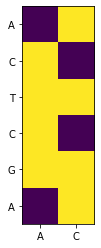

In [25]:
# Add Some facnyness to it
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq2))), list(seq2))
yt=plt.yticks(np.arange(len(list(seq1))), list(seq1))
plt.show()

In [26]:
# Convert to Fxn
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

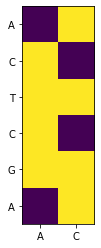

In [27]:
dotplotx(seq1,seq2)

### Comparative of Covid, Sars,Merbs, Ebola
* Covid19(SARS-CoV2) is a novel coronavirus identified as the cause of coronavirus disease 2019 (COVID-19) that began in Wuhan, China in late 2019 and spread worldwide.
* MERS(MERS-CoV) was identified in 2012 as the cause of Middle East respiratory syndrome (MERS).
* SARS(SARS-CoV) was identified in 2002 as the cause of an outbreak of severe acute respiratory syndrome (SARS).


In [28]:
from Bio import SeqIO

In [29]:
import os

In [30]:
os.getcwd()

'/home/phantom/jupyter_notebook'

In [31]:
covid = SeqIO.read("Sarcov_Genome/human-sarcov2.fasta","fasta")
pangolin = SeqIO.read("Sarcov_Genome/pangolin.fasta","fasta")
bat_Ratc13 = SeqIO.read("Sarcov_Genome/bat-Ratc13.fasta","fasta")
bat_Rs4231 = SeqIO.read("Sarcov_Genome/Bat-Rs4231.fasta","fasta")
bat_beta = SeqIO.read("Sarcov_Genome/BtRs-BetaCoV-YN2018B.fasta","fasta")
sars_urbani = SeqIO.read("Sarcov_Genome/SARS coronavirus Urbani.fasta","fasta")

In [32]:
covid

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [33]:
pangolin

SeqRecord(seq=Seq('CACGCAGTATAATTAATANNNNNNNNCTGTCGTTGACAGGACACGAGTAACTCG...CGA'), id='MT084071.1', name='MT084071.1', description='MT084071.1 Pangolin coronavirus isolate MP789 genomic sequence', dbxrefs=[])

In [34]:
bat_Ratc13

SeqRecord(seq=Seq('CTTTCCAGGTAACAAACCAACGAACTCTCGATCTCTTGTAGATCTGTTCTCTAA...AAA'), id='MN996532.1', name='MN996532.1', description='MN996532.1 Bat coronavirus RaTG13, complete genome', dbxrefs=[])

In [35]:
bat_Rs4231

SeqRecord(seq=Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA'), id='KY417146.1', name='KY417146.1', description='KY417146.1 Bat SARS-like coronavirus isolate Rs4231, complete genome', dbxrefs=[])

In [36]:
bat_beta

SeqRecord(seq=Seq('TTTTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGAT...TCC'), id='MK211376.1', name='MK211376.1', description='MK211376.1 Coronavirus BtRs-BetaCoV/YN2018B, complete genome', dbxrefs=[])

In [37]:
sars_urbani

SeqRecord(seq=Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...GAC'), id='AY278741.1', name='AY278741.1', description='AY278741.1 SARS coronavirus Urbani, complete genome', dbxrefs=[])

In [38]:
# Conver or get the sequences
covid_seq = covid.seq
pangolin_seq = pangolin.seq
bat_Ratc13_seq = bat_Ratc13.seq
bat_Rs4231_seq = bat_Rs4231.seq
bat_beta_seq = bat_beta.seq
sars_urbani_seq = sars_urbani.seq

In [39]:
print("Covid seq : ", len(covid_seq))
print("Pangolin seq : ", len(pangolin_seq))
print("Ratc13 seq : ", len(bat_Ratc13_seq))
print("Rs4231 seq : ", len(bat_Rs4231_seq))
print("Beta seq : ", len(bat_beta_seq))
print("Urbani seq : ", len(sars_urbani_seq))

Covid seq :  29903
Pangolin seq :  27213
Ratc13 seq :  29855
Rs4231 seq :  29782
Beta seq :  30256
Urbani seq :  29727


In [40]:
#Check for the GC content
from Bio.SeqUtils import GC

In [41]:
print("GC content of Covid seq : ", GC(covid_seq))
print("GC content of Covid seq : ", GC(pangolin_seq))
print("GC content of Covid seq :  ", GC(bat_Ratc13_seq))
print("GC content of Covid seq : ", GC(bat_Rs4231_seq))
print("GC content of Covid seq : ", GC(bat_beta_seq))
print("GC content of Covid seq : ", GC(sars_urbani_seq))

GC content of Covid seq :  37.97277865097148
GC content of Covid seq :  35.66677690809539
GC content of Covid seq :   38.037179701892484
GC content of Covid seq :  40.95090994560473
GC content of Covid seq :  40.84148598625066
GC content of Covid seq :  40.797927809735256


In [42]:
covid_protein = covid_seq.translate()
pangolin_protein = pangolin_seq.translate()
bat_Ratc13_protein = bat_Ratc13_seq.translate()
bat_Rs4231_protein = bat_Rs4231_seq.translate()
bat_beta_protein = bat_beta_seq.translate()
sars_urbani_protein = sars_urbani_seq.translate()

/home/phantom/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [43]:
print("Covid protein : ", len(covid_protein))
print("Pangolin protein : ", len(pangolin_protein))
print("Ratc13 protein : ", len(bat_Ratc13_protein))
print("Rs4231 protein : ", len(bat_Rs4231_protein))
print("Beta protein : ", len(bat_beta_protein))
print("Urbani protein : ", len(sars_urbani_protein))

Covid protein :  9967
Pangolin protein :  9071
Ratc13 protein :  9951
Rs4231 protein :  9927
Beta protein :  10085
Urbani protein :  9909


### Check for the count of Amino Acids

In [44]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [45]:
covid_analysed = ProteinAnalysis(str(covid_protein))
pangolin_analysed = ProteinAnalysis(str(pangolin_protein))
bat_Ratc13_analysed = ProteinAnalysis(str(bat_Ratc13_protein))
bat_Rs4231_analysed = ProteinAnalysis(str(bat_Rs4231_protein))
bat_beta_analysed = ProteinAnalysis(str(bat_beta_protein))
sars_urbani_analysed = ProteinAnalysis(str(sars_urbani_protein))

In [46]:
# Check for the Frequence of AA
covid_analysed.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [47]:
# method 2
from collections import Counter

In [48]:
covid_freq = Counter(covid_protein)
pangolin_freq = Counter(pangolin_protein)
bat_Ratc13_freq = Counter(bat_Ratc13_protein)
bat_Rs4231_freq = Counter(bat_Rs4231_protein)
bat_beta_freq = Counter(bat_beta_protein)
sars_urbani_freq = Counter(sars_urbani_protein)


In [49]:
covid_freq

Counter({'I': 436,
         'K': 413,
         'G': 394,
         'L': 886,
         'Y': 505,
         'P': 292,
         'R': 558,
         '*': 774,
         'Q': 325,
         'T': 679,
         'N': 472,
         'S': 810,
         'C': 635,
         'V': 548,
         'F': 593,
         'A': 375,
         'H': 332,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

In [50]:
#Most common amino acid in Covid
Counter(covid_protein).most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [51]:
#Most common amino acid in Pangolin
Counter(pangolin_protein).most_common(10)

[('L', 1070),
 ('X', 652),
 ('S', 603),
 ('T', 602),
 ('V', 581),
 ('I', 435),
 ('K', 415),
 ('*', 398),
 ('F', 395),
 ('N', 391)]

In [52]:
#Most common amino acid in Ratc13
Counter(bat_Ratc13_protein).most_common(10)

[('L', 903),
 ('S', 829),
 ('*', 747),
 ('T', 673),
 ('C', 602),
 ('F', 575),
 ('R', 546),
 ('V', 540),
 ('Y', 531),
 ('N', 464)]

In [53]:
#Most common amino acid in Rs4231
Counter(bat_Rs4231_protein).most_common(10)

[('L', 1174),
 ('S', 758),
 ('T', 724),
 ('V', 716),
 ('A', 588),
 ('I', 549),
 ('K', 503),
 ('G', 459),
 ('F', 454),
 ('N', 443)]

In [54]:
#Most common amino acid in bat beta
Counter(bat_beta_protein).most_common(10)

[('L', 1444),
 ('S', 848),
 ('*', 726),
 ('T', 655),
 ('V', 622),
 ('C', 566),
 ('R', 561),
 ('I', 474),
 ('F', 447),
 ('Q', 424)]

In [55]:
#Most common amino acid in sars urbani
Counter(sars_urbani_protein).most_common(10)

[('L', 1368),
 ('S', 738),
 ('T', 689),
 ('V', 684),
 ('A', 574),
 ('I', 566),
 ('K', 495),
 ('G', 438),
 ('F', 437),
 ('R', 417)]

<BarContainer object of 21 artists>

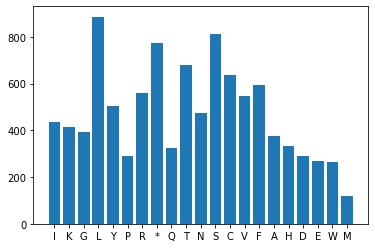

In [56]:
# Plot the Amino acids
plt.bar(covid_freq.keys(), covid_freq.values())

<BarContainer object of 22 artists>

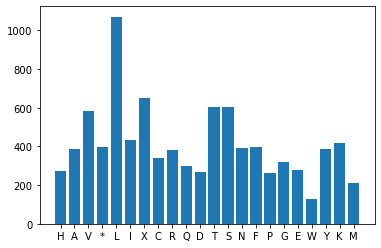

In [57]:
# Plot the Amino acids
plt.bar(pangolin_freq.keys(), pangolin_freq.values())

<BarContainer object of 21 artists>

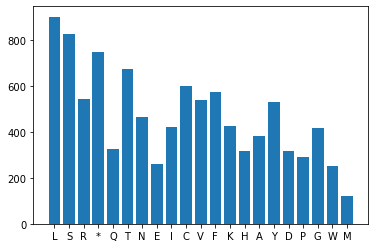

In [58]:
# Plot the Amino acids
plt.bar(bat_Ratc13_freq.keys(), bat_Ratc13_freq.values())

<BarContainer object of 21 artists>

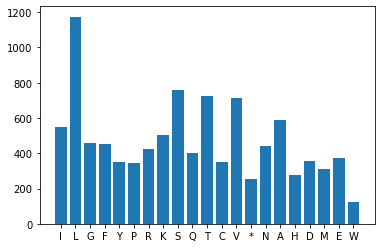

In [59]:
# Plot the Amino acids
plt.bar(bat_Rs4231_freq.keys(), bat_Rs4231_freq.values())

<BarContainer object of 21 artists>

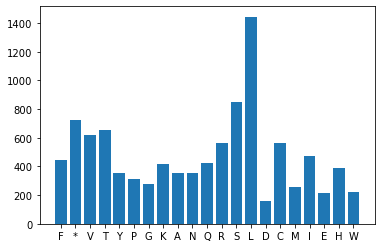

In [60]:
# Plot the Amino acids
plt.bar(bat_beta_freq.keys(), bat_beta_freq.values())

<BarContainer object of 21 artists>

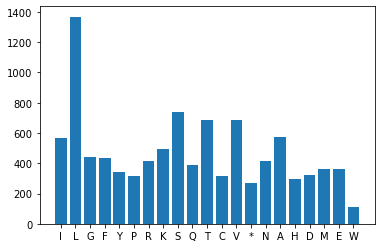

In [61]:
# Plot the Amino acids
plt.bar(sars_urbani_freq.keys(),sars_urbani_freq.values())

In [62]:
# Check for the modecular wieght

### Dot Plot

In [63]:
# compare covid and pangolin
dotplot(covid_seq[0:10],pangolin_seq[0:10])

 |CACGCAGTAT
------------
A| ■   ■  ■ 
T|       ■ ■
T|       ■ ■
A| ■   ■  ■ 
A| ■   ■  ■ 
A| ■   ■  ■ 
G|   ■  ■   
G|   ■  ■   
T|       ■ ■
T|       ■ ■


In [64]:
# pairwise alignment

In [77]:
conv_n_pangolind = pairwise2.align.globalxx(covid_seq,pangolin_seq,one_alignment_only=True,score_only=True)

In [79]:
conv_n_pangolind

23302.0

In [80]:
conv_n_pangolind/len(covid_seq)*100

77.92529177674481

In [71]:
conv_n_batRtc13 = pairwise2.align.globalxx(covid_seq[0:100],bat_Ratc13_seq[0:100],one_alignment_only=True,score_only=True)

In [72]:
conv_n_batRtc13

81.0

In [81]:
conv_n_batRs4231/len(covid_seq)*100

82.90138113232786

In [75]:
conv_n_batRs4231 = pairwise2.align.globalxx(covid_seq,bat_Rs4231_seq,one_alignment_only=True,score_only=True)

In [76]:
conv_n_batRs4231

24790.0

### 3D structure

In [93]:
from Bio.PDB import PDBParser,MMCIFParser

In [94]:
parser = PDBParser()

In [95]:
covid_structure = parser.get_structure("6UL7", "6LU7.pdb")

/home/phantom/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'MODEL' at line 2475
  warnings.warn(
/home/phantom/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'MODEL' at line 2527
  warnings.warn(
/home/phantom/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'MODEL' at line 4897
  warnings.warn(


In [96]:
len(covid_structure)

4

In [97]:
import nglview as nv

In [98]:
view_covid = nv.show_biopython(covid_structure)

In [99]:
view_covid

NGLWidget()

In [101]:
import py3Dmol

In [102]:
view1 = py3Dmol.view(query='pdb:6LU7')

In [105]:
view1.setStyle({'cartoon':{'color':'spectrum'}})
view1

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [106]:
dir(py3Dmol.view)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_make_html',
 '_repr_html_',
 'getModel',
 'insert',
 'model',
 'png',
 'show',
 'update']

In [108]:
view_covid.render_image()

In [110]:
view_covid._display_image()